In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [42]:
# ---------------------------------------------------------------------------
#  WIL Data Analytics Project (Customer Churn Analysis)
# ---------------------------------------------------------------------------

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# read and load the file into the dataframe
dataFile = r'cleaned_encoded_customer_churn.csv'
dataFrame = pd.read_csv(dataFile, sep = ',')

# displaying the number of instances(rows) and attributes(columnss)
print('Number of Instances =', dataFrame.shape[0])
print('Number of Attributes =', dataFrame.shape[1])

Number of Instances = 7043
Number of Attributes = 12


In [43]:
# understand the dataset
df_info = dataFrame.info()
print("-----------------------------------------------------------------")
dataFrame.head(10) # first 10 rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seniorcitizen                7043 non-null   float64
 1   tenure                       7043 non-null   float64
 2   monthlycharges               7043 non-null   float64
 3   gender_Male                  7043 non-null   bool   
 4   dependents_Yes               7043 non-null   bool   
 5   phoneservice_Yes             7043 non-null   bool   
 6   multiplelines_Yes            7043 non-null   bool   
 7   internetservice_Fiber optic  7043 non-null   bool   
 8   contract_One year            7043 non-null   float64
 9   contract_Two year            7043 non-null   float64
 10  contract_Month-to-month      7043 non-null   float64
 11  churn_Yes                    7043 non-null   bool   
dtypes: bool(6), float64(6)
memory usage: 371.5 KB
------------------------------

,seniorcitizen,tenure,monthlycharges,gender_Male,dependents_Yes,phoneservice_Yes,multiplelines_Yes,internetservice_Fiber optic,contract_One year,contract_Two year,contract_Month-to-month,churn_Yes
0,0.0,0.013889,0.069307,False,False,False,False,False,0.0,0.0,1.0,True
1,0.0,0.569444,0.069307,True,False,True,False,False,1.0,0.0,0.0,False
2,0.0,0.722222,0.009901,False,True,True,False,False,0.0,0.0,1.0,False
3,0.0,0.013889,0.574257,False,False,True,False,False,1.0,0.0,0.0,True
4,0.0,0.930556,0.326733,True,False,True,False,True,0.0,0.0,1.0,False
5,1.0,0.944444,0.712871,False,False,True,True,True,0.0,0.0,1.0,True
6,0.0,0.319444,0.584158,False,True,True,True,True,0.0,0.0,1.0,False
7,0.0,1.000000,0.534653,True,True,True,False,False,0.0,0.0,1.0,False
8,0.0,0.972222,0.851485,True,False,True,True,True,0.0,0.0,1.0,True
9,0.0,0.013889,0.009901,True,False,True,False,False,1.0,0.0,0.0,True


In [44]:
# check the missing data points

attributes = dataFrame.columns

# Visiting each column to check missing data
for att in attributes:
        #getting the total missing value in each attribute
        totalMissingValues = dataFrame[att].isnull().sum()

print("Total Missing Data:", totalMissingValues)

Total Missing Data: 0


In [45]:
# more specific insight for missing data points

missing_values = dataFrame.isnull().sum()
missing_values

seniorcitizen                  0
tenure                         0
monthlycharges                 0
gender_Male                    0
dependents_Yes                 0
phoneservice_Yes               0
multiplelines_Yes              0
internetservice_Fiber optic    0
contract_One year              0
contract_Two year              0
contract_Month-to-month        0
churn_Yes                      0
dtype: int64

In [46]:
# getting the total number of duplicates rows
print("Total number of duplicated rows:", dataFrame.duplicated().sum())

print("---------------------------------------------------------------------------------")

# checking and keeping the first occurrence as non-duplicate
duplicates = dataFrame.duplicated(keep='first')
print("Duplicate rows (except first occurrence):")
dataFrame[duplicates]

Total number of duplicated rows: 302
---------------------------------------------------------------------------------
Duplicate rows (except first occurrence):


,seniorcitizen,tenure,monthlycharges,gender_Male,dependents_Yes,phoneservice_Yes,multiplelines_Yes,internetservice_Fiber optic,contract_One year,contract_Two year,contract_Month-to-month,churn_Yes
78,0.0,0.013889,0.019802,True,False,True,False,False,0.0,0.0,1.0,False
97,0.0,0.013889,0.019802,True,False,True,False,False,0.0,0.0,1.0,False
352,0.0,0.013889,0.019802,True,False,True,False,True,0.0,0.0,1.0,False
398,0.0,0.013889,0.019802,True,False,True,False,False,0.0,0.0,1.0,False
402,0.0,0.013889,0.019802,True,False,True,True,True,0.0,0.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6938,0.0,0.527778,0.019802,False,True,True,True,False,0.0,1.0,0.0,False
6984,0.0,0.013889,0.267327,True,False,True,False,False,0.0,0.0,1.0,False
6991,0.0,0.013889,0.277228,True,False,True,True,True,0.0,0.0,1.0,True
7001,0.0,0.152778,0.019802,True,False,True,False,False,0.0,0.0,1.0,False


In [47]:
# dropped all duplicates except the first occurrence
dataFrame = dataFrame.drop_duplicates(keep='first')

# Reset the index of the cleaned DataFrame
dataFrame = dataFrame.reset_index(drop=True)
print("\nDataFrame after removing duplicates (keeping first occurrence):")
dataFrame


DataFrame after removing duplicates (keeping first occurrence):


,seniorcitizen,tenure,monthlycharges,gender_Male,dependents_Yes,phoneservice_Yes,multiplelines_Yes,internetservice_Fiber optic,contract_One year,contract_Two year,contract_Month-to-month,churn_Yes
0,0.0,0.013889,0.069307,False,False,False,False,False,0.0,0.0,1.0,True
1,0.0,0.569444,0.069307,True,False,True,False,False,1.0,0.0,0.0,False
2,0.0,0.722222,0.009901,False,True,True,False,False,0.0,0.0,1.0,False
3,0.0,0.013889,0.574257,False,False,True,False,False,1.0,0.0,0.0,True
4,0.0,0.930556,0.326733,True,False,True,False,True,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6736,0.0,0.013889,0.762376,True,False,True,True,False,1.0,0.0,0.0,True
6737,0.0,0.319444,0.722772,False,True,True,True,True,1.0,0.0,0.0,False
6738,0.0,0.166667,0.029703,True,True,True,False,False,0.0,0.0,1.0,False
6739,1.0,0.166667,0.801980,True,False,True,True,True,0.0,0.0,1.0,True


In [48]:
# dataFrame['Dependents'].unique()
attributes = dataFrame.columns

for att in attributes:
        # looking at the values of the columns
        print("Column:", att, "-->", dataFrame[att].unique())

Column: seniorcitizen --> [0. 1.]
Column: tenure --> [0.01388889 0.56944444 0.72222222 0.93055556 0.94444444 0.31944444
 1.         0.97222222 0.47222222 0.38888889 0.25       0.20833333
 0.15277778 0.51388889 0.30555556 0.63888889 0.70833333 0.06944444
 0.625      0.40277778 0.69444444 0.375      0.83333333 0.23611111
 0.45833333 0.91666667 0.95833333 0.79166667 0.11111111 0.19444444
 0.34722222 0.09722222 0.18055556 0.26388889 0.81944444 0.125
 0.04166667 0.13888889 0.54166667 0.75       0.48611111 0.16666667
 0.43055556 0.73611111 0.41666667 0.66666667 0.52777778 0.90277778
 0.33333333 0.55555556 0.59722222 0.98611111 0.84722222 0.36111111
 0.58333333 0.29166667 0.77777778 0.05555556 0.08333333 0.76388889
 0.02777778 0.61111111 0.86111111 0.875      0.68055556 0.27777778
 0.22222222 0.65277778 0.44444444 0.88888889 0.80555556 0.5
 0.        ]
Column: monthlycharges --> [0.06930693 0.00990099 0.57425743 0.32673267 0.71287129 0.58415842
 0.53465347 0.85148515 0.01980198 0.65346535 0.6

In [49]:
# ---------------------------------------------------------------------------
# Encoding Categorical Variables (considering encoded columns)
# ---------------------------------------------------------------------------

import pandas as pd

# Load the encoded dataset
dataFrame = pd.read_csv('cleaned_encoded_customer_churn.csv')

# Create 'contract_Month-to-month' column from absence of other contract types
if 'contract_One year' in dataFrame.columns and 'contract_Two year' in dataFrame.columns:
    dataFrame['contract_Month-to-month'] = (
        (dataFrame['contract_One year'] == 0) & (dataFrame['contract_Two year'] == 0)
    ).astype(int)

# Ensure all one-hot encoded contract columns are present
one_hot_contracts = ['contract_Month-to-month', 'contract_One year', 'contract_Two year']

for col in one_hot_contracts:
    if col not in dataFrame.columns:
        dataFrame[col] = 0
    else:
        dataFrame[col] = dataFrame[col].fillna(0).astype(int)

# Confirm there are no missing values in columns
print(dataFrame[one_hot_contracts].isnull().sum())

# Final encoded dataset
encoded_dataframe = dataFrame

# sample rows display
encoded_dataframe.head()


contract_Month-to-month    0
contract_One year          0
contract_Two year          0
dtype: int64


,seniorcitizen,tenure,monthlycharges,gender_Male,dependents_Yes,phoneservice_Yes,multiplelines_Yes,internetservice_Fiber optic,contract_One year,contract_Two year,contract_Month-to-month,churn_Yes
0,0.0,0.013889,0.069307,False,False,False,False,False,0,0,1,True
1,0.0,0.569444,0.069307,True,False,True,False,False,1,0,0,False
2,0.0,0.722222,0.009901,False,True,True,False,False,0,0,1,False
3,0.0,0.013889,0.574257,False,False,True,False,False,1,0,0,True
4,0.0,0.930556,0.326733,True,False,True,False,True,0,0,1,False


In [50]:
# Statistical summary of numerical variables

# dataFrame.describe()
encoded_dataframe.describe()

,seniorcitizen,tenure,monthlycharges,contract_One year,contract_Two year,contract_Month-to-month
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.449599,0.462958,0.209144,0.240664,0.550192
std,0.368612,0.341104,0.297937,0.406726,0.427517,0.497510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.125000,0.178218,0.000000,0.000000,0.000000
50%,0.000000,0.402778,0.514851,0.000000,0.000000,1.000000
75%,0.000000,0.763889,0.712871,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:

#using min-max scaling to scale the preprocessed dataset

# making a copy of the processed dataframe
df_copy = encoded_dataframe.copy()
df_copy

,seniorcitizen,tenure,monthlycharges,gender_Male,dependents_Yes,phoneservice_Yes,multiplelines_Yes,internetservice_Fiber optic,contract_One year,contract_Two year,contract_Month-to-month,churn_Yes
0,0.0,0.013889,0.069307,False,False,False,False,False,0,0,1,True
1,0.0,0.569444,0.069307,True,False,True,False,False,1,0,0,False
2,0.0,0.722222,0.009901,False,True,True,False,False,0,0,1,False
3,0.0,0.013889,0.574257,False,False,True,False,False,1,0,0,True
4,0.0,0.930556,0.326733,True,False,True,False,True,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.013889,0.762376,True,False,True,True,False,1,0,0,True
7039,0.0,0.319444,0.722772,False,True,True,True,True,1,0,0,False
7040,0.0,0.166667,0.029703,True,True,True,False,False,0,0,1,False
7041,1.0,0.166667,0.801980,True,False,True,True,True,0,0,1,True


In [52]:
# remove the target variable 'Churn', and scale the feature columns only

# separate the target variable 'Churn'
targetColumn = encoded_dataframe['churn_Yes']
# targetVar.head(20)
targetColumn

0        True
1       False
2       False
3        True
4       False
        ...  
7038     True
7039    False
7040    False
7041     True
7042    False
Name: churn_Yes, Length: 7043, dtype: bool

In [53]:
# drop the target column('Churn') from the dataset
# create new features_dataframe for storing the dataframe
# features_dataframe only contains all the feature columns
features_dataframe = encoded_dataframe.drop(columns=['churn_Yes'])
features_dataframe

,seniorcitizen,tenure,monthlycharges,gender_Male,dependents_Yes,phoneservice_Yes,multiplelines_Yes,internetservice_Fiber optic,contract_One year,contract_Two year,contract_Month-to-month
0,0.0,0.013889,0.069307,False,False,False,False,False,0,0,1
1,0.0,0.569444,0.069307,True,False,True,False,False,1,0,0
2,0.0,0.722222,0.009901,False,True,True,False,False,0,0,1
3,0.0,0.013889,0.574257,False,False,True,False,False,1,0,0
4,0.0,0.930556,0.326733,True,False,True,False,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.013889,0.762376,True,False,True,True,False,1,0,0
7039,0.0,0.319444,0.722772,False,True,True,True,True,1,0,0
7040,0.0,0.166667,0.029703,True,True,True,False,False,0,0,1
7041,1.0,0.166667,0.801980,True,False,True,True,True,0,0,1


In [54]:
features_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seniorcitizen                7043 non-null   float64
 1   tenure                       7043 non-null   float64
 2   monthlycharges               7043 non-null   float64
 3   gender_Male                  7043 non-null   bool   
 4   dependents_Yes               7043 non-null   bool   
 5   phoneservice_Yes             7043 non-null   bool   
 6   multiplelines_Yes            7043 non-null   bool   
 7   internetservice_Fiber optic  7043 non-null   bool   
 8   contract_One year            7043 non-null   int64  
 9   contract_Two year            7043 non-null   int64  
 10  contract_Month-to-month      7043 non-null   int64  
dtypes: bool(5), float64(3), int64(3)
memory usage: 364.7 KB


In [55]:
# normalising data for attributes that have very large values
# perform normalisation to reduce variance

# print("\nData Normalisation to handle attributes with very large values")

# select the numerical columns for scaling and returns a numeric DataFrame(featuresDF_numeric)
featuresDF_numeric = features_dataframe.select_dtypes(include='number')

# apply min-max scaling to the numerical columns(featuresDF_numeric-DataFrame of numerical columns)
scaled_dataFrame = MinMaxScaler().fit_transform(featuresDF_numeric)

# convert the scaled data back to a DataFrame with the original numerical column names
scaled_numerical_df = pd.DataFrame(scaled_dataFrame, columns=featuresDF_numeric.columns, index=features_dataframe.index)

# replace the original numerical columns in the features DataFrame with the scaled ones
features_dataframe[featuresDF_numeric.columns] = scaled_numerical_df

# add the 'Churn' column (target) back to the scaled dataset
scaled_df_final = pd.concat([features_dataframe, targetColumn], axis=1)

# display final scaled dataframe
scaled_df_final

,seniorcitizen,tenure,monthlycharges,gender_Male,dependents_Yes,phoneservice_Yes,multiplelines_Yes,internetservice_Fiber optic,contract_One year,contract_Two year,contract_Month-to-month,churn_Yes
0,0.0,0.013889,0.069307,False,False,False,False,False,0.0,0.0,1.0,True
1,0.0,0.569444,0.069307,True,False,True,False,False,1.0,0.0,0.0,False
2,0.0,0.722222,0.009901,False,True,True,False,False,0.0,0.0,1.0,False
3,0.0,0.013889,0.574257,False,False,True,False,False,1.0,0.0,0.0,True
4,0.0,0.930556,0.326733,True,False,True,False,True,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.013889,0.762376,True,False,True,True,False,1.0,0.0,0.0,True
7039,0.0,0.319444,0.722772,False,True,True,True,True,1.0,0.0,0.0,False
7040,0.0,0.166667,0.029703,True,True,True,False,False,0.0,0.0,1.0,False
7041,1.0,0.166667,0.801980,True,False,True,True,True,0.0,0.0,1.0,True


In [56]:
# save the scaled dataset to a new csv file
scaled_df_final.to_csv(r'D:\pradeep\Clustering Data\scaled_cleaned_encoded_customer_churn.csv', index=False)

Converting boolean columns to integers for histogram plotting...


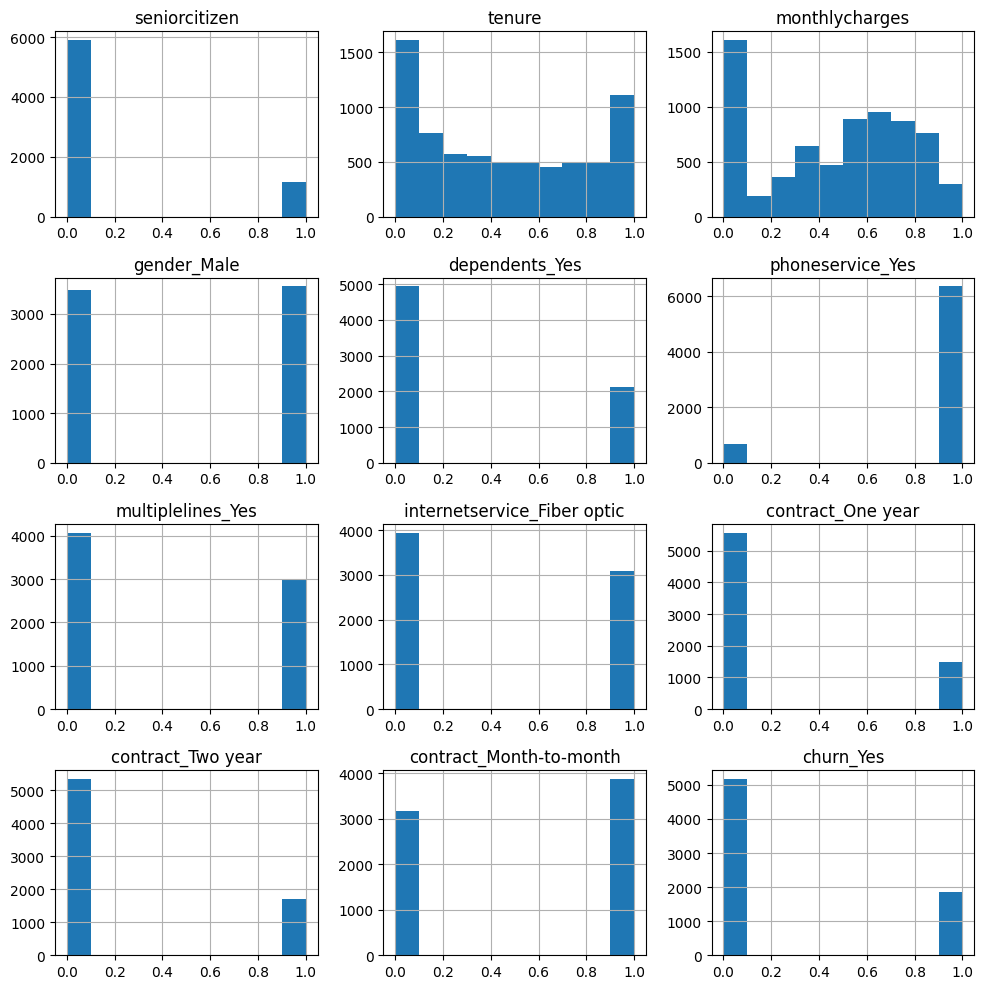

In [57]:
# Convert boolean columns to integers before plotting
bool_cols = scaled_df_final.select_dtypes(include='bool').columns

if len(bool_cols) > 0:
    print("Converting boolean columns to integers for histogram plotting...")
    scaled_df_final[bool_cols] = scaled_df_final[bool_cols].astype(int)

# Then plot the histograms
scaled_df_final.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()


In [58]:
# split the dataset into distinct training and testing sets and saving them

# scaled_df_final
print('Number of Instances =', scaled_df_final.shape[0])

# drop the target column('Churn') from the scaled dataset
x = scaled_df_final.drop(columns=['churn_Yes']) #features
y = scaled_df_final['churn_Yes'] #target

Number of Instances = 7043


In [59]:
# randomising data split
# splitting the data into training and testing sets : 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [60]:
# saving the training data and testing data into their respective folder
X_train.to_csv('./TrainingSet/X_train.csv', index=False)
X_test.to_csv('./TestSet/X_test.csv', index=False)
y_train.to_csv('./TrainingSet/y_train.csv', index=False)
y_test.to_csv('./TestSet/y_test.csv', index=False)

# following can be used to visualise the index of the dataset(note that the index shows randomise dataset)
# X_train.to_csv('./TrainingSet/X_train.csv', index=True) 

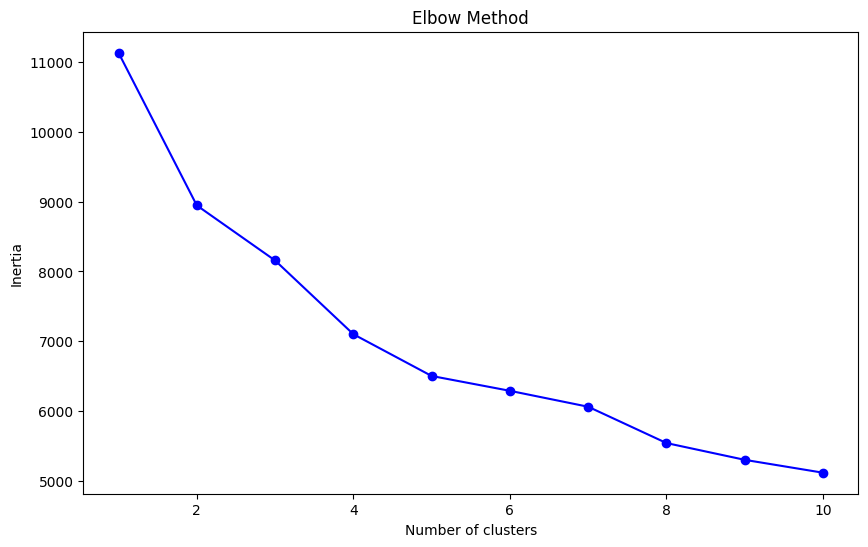

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 11)  # Trying for 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # using features from training set
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [62]:
#The above diagram Shows that the elbow appears to be around 4.



optimal_k = 4

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# Save the labels
y_train_clusters = kmeans.labels_


In [63]:
# Just in case, you want to add the cluster labels to the training dataset in future analysis:
X_train['Cluster'] = y_train_clusters

In [64]:
# Imports
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Keep only numeric columns eliminating any text labels or unintentional cluster names
X_train_numeric = X_train.select_dtypes(include=['number'])

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_train_numeric)

# Create DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Cluster'] = y_train_clusters  # Make sure y_train_clusters is a list or Series

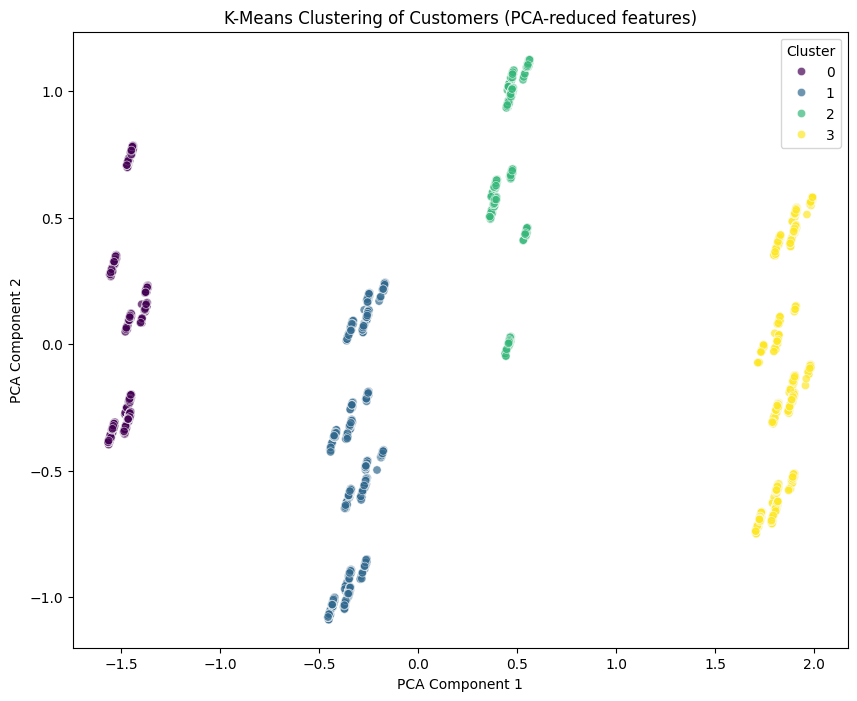

In [65]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('K-Means Clustering of Customers (PCA-reduced features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [66]:
# forExample: Analyzing average features in each cluster
cluster_labels = X_train.groupby('Cluster').mean()
print(cluster_labels)

# Based on these averages, we can assign descriptive labels:
# E.g., if Cluster 0 has high tenure and low charges, label it "Loyal Customers"
# Modify this according to your analysis


         seniorcitizen    tenure  monthlycharges  gender_Male  dependents_Yes  \
Cluster                                                                         
0             0.199117  0.420466        0.477011     0.704357        0.101489   
1             0.178723  0.451761        0.446985     0.497872        0.304681   
2             0.104606  0.490242        0.443860     0.225605        0.570648   
3             0.159707  0.447670        0.466826     0.526007        0.296703   

         phoneservice_Yes  multiplelines_Yes  internetservice_Fiber optic  \
Cluster                                                                     
0                0.905130           0.284611                     0.338114   
1                0.894468           0.416170                     0.365106   
2                0.907104           0.503513                     0.832162   
3                0.898168           0.516484                     0.254212   

         contract_One year  contract_Two year  con

In [67]:
#Adding Human-Readable Cluster Personas
cluster_personas = {
    0: "Flexible contract, low-dependency users",
    1: "Mid-tier users with 1-year plans",
    2: "Family-oriented, high-internet usage",
    3: "Loyal long-term contract customers"
}

X_train['Persona'] = X_train['Cluster'].map(cluster_personas)


/var/folders/q0/xfmj5gk906x2kphcflqyhhc40000gn/T/ipykernel_6114/1241512392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x='Persona', palette='pastel')


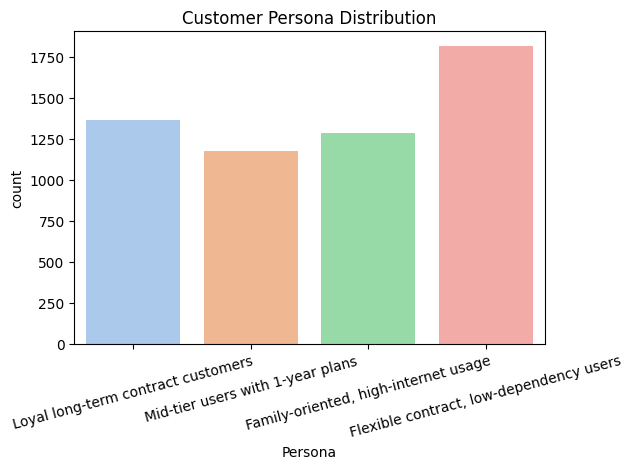

In [68]:
# Visualize Persona Count
sns.countplot(data=X_train, x='Persona', palette='pastel')
plt.title('Customer Persona Distribution')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [69]:
# Generate strategic recommendations based on cluster traits
for cluster_id, details in cluster_labels.iterrows():
    print(f"\nCluster {cluster_id} - {cluster_personas[cluster_id]}")
    print("Recommendation:")

    # Cluster 0 and 2 — month-to-month
    if details.get('contract_Month-to-month', 0) == 1.0:
        print("- Consider offering long-term contract discounts.")

    # Cluster 2 — high fiber usage
    if details.get('internetservice_Fiber optic', 0) > 0.7:
        print("- Upsell premium internet bundles or smart-home services.")

    # Cluster 2 — family-focused
    if details.get('dependents_Yes', 0) > 0.5:
        print("- Promote family plans with more data/lines.")

    # Cluster 1 — 1-year contract users
    if details.get('contract_One year', 0) == 1.0:
        print("- Offer contract upgrades to 2-year plans with added benefits.")
        print("- Run customer feedback campaigns to encourage loyalty.")
        print("- Offer targeted bundles to increase stickiness.")

    # Cluster 3 — long-term contract customers
    if details.get('contract_Two year', 0) == 1.0:
        print("- Maintain loyalty with exclusive rewards or VIP programs.")
        print("- Encourage referrals through member-get-member offers.")
        print("- Keep them engaged with surprise perks or upgrades.")



Cluster 0 - Flexible contract, low-dependency users
Recommendation:
- Consider offering long-term contract discounts.

Cluster 1 - Mid-tier users with 1-year plans
Recommendation:
- Offer contract upgrades to 2-year plans with added benefits.
- Run customer feedback campaigns to encourage loyalty.
- Offer targeted bundles to increase stickiness.

Cluster 2 - Family-oriented, high-internet usage
Recommendation:
- Consider offering long-term contract discounts.
- Upsell premium internet bundles or smart-home services.
- Promote family plans with more data/lines.

Cluster 3 - Loyal long-term contract customers
Recommendation:
- Maintain loyalty with exclusive rewards or VIP programs.
- Encourage referrals through member-get-member offers.
- Keep them engaged with surprise perks or upgrades.


In [70]:
X_train.to_csv('./TrainingSet/X_train_with_clusters.csv', index=False)